<a href="https://colab.research.google.com/github/kaushikabhishek87/Tensorflow_projects/blob/main/05_Transfer_Learning_Tensorflow_part_2_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Importing helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-06-23 11:26:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-06-23 11:26:05 (79.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [17]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
# Fetching Data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2021-06-22 17:31:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 142.250.157.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   149MB/s    in 1.1s    

2021-06-22 17:31:59 (149 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# Check out images & subdir

walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [ ]:
train_dir = "10_food_classes_10_percent/train"
test_dir =  "10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf
IMG_SIZE = (224,224)
BATCH_SIZE= 32

In [ ]:
# Using image_dataset_from_directory insted of ImageDataGenerator as it is better and new version
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory= train_dir,
                                                                    image_size=IMG_SIZE, 
                                                                    label_mode="categorical",
                                                                    batch_size=BATCH_SIZE,)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                  label_mode="categorical",
                                                                  image_size=IMG_SIZE,
                                                                  batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [ ]:
# Class Names
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data.take(1):
  print(images, labels)


tf.Tensor(
[[[[ 72.71429    118.71429    107.71429   ]
   [ 69.571434   115.571434   104.571434  ]
   [ 73.35204    119.35204    108.35204   ]
   ...
   [ 59.78567    114.64286    101.362236  ]
   [ 57.68877    112.97449     99.61734   ]
   [ 56.357143   111.64286     98.28571   ]]

  [[ 73.38265    119.38265    108.38265   ]
   [ 71.86224    117.86224    106.86224   ]
   [ 75.19898    121.19898    110.19898   ]
   ...
   [ 56.173466   116.92857    102.015305  ]
   [ 55.071415   115.85713    100.92856   ]
   [ 54.142857   114.92857    100.        ]]

  [[ 72.57143    118.57143    108.57143   ]
   [ 71.28571    117.28571    107.28571   ]
   [ 73.         119.         109.        ]
   ...
   [ 54.979557   114.21429    102.21429   ]
   [ 54.428574   114.         102.        ]
   [ 54.147934   113.71936    101.71936   ]]

  ...

  [[ 50.27546     96.27546     83.27546   ]
   [ 45.704098    91.7041      78.7041    ]
   [ 54.734924   100.092064    89.30635   ]
   ...
   [ 33.04591     71.831

In [ ]:
## Model 0 0 Transer Learning/ using Keras Fucntional API

In [ ]:
# 1. Create base model using keras application mode
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model
base_model.trainable = False

#3. Create imputs 
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# 4. Might need to mormalise input for ResNet50V2 (Dont need to Efficient Net as they have scaling built in if you are using from keras.application)
# X = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model
X = base_model(inputs)
print(f"Shape after passing input through base model: {X.shape}")

# 6. Average Pool teh output
X = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(X)
print(f"Shape after GlobalAverage2D: {X.shape}")

# 7. Create the O/P activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(X)

# 8. Combine I/O and O/P
model_0 = tf.keras.Model(inputs, outputs)

16711680/16705208 [==============================] - 0s 0us/step
Shape after passing input through base model: (None, 7, 7, 1280)
Shape after GlobalAverage2D: (None, 1280)


In [ ]:
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_model_0 = model_0.fit(train_data, 
                              epochs=5, 
                              steps_per_epoch=len(train_data), 
                              validation_data = test_data, 
                              validation_steps=(0.25 * len(test_data)),
                              callbacks=[create_tensorboard_callback(dir_name="transer_learning", experiment_name="model_0")])

Epoch 1/5
24/24 [==============================] - 158s 7s/step - loss: 1.8887 - accuracy: 0.3973 - val_loss: 1.3233 - val_accuracy: 0.7196


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f4e459aa3b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


Epoch 2/5
24/24 [==============================] - 150s 6s/step - loss: 1.1413 - accuracy: 0.7533 - val_loss: 0.9147 - val_accuracy: 0.7972
Epoch 3/5
24/24 [==============================] - 151s 6s/step - loss: 0.8394 - accuracy: 0.8053 - val_loss: 0.7440 - val_accuracy: 0.8264
Epoch 4/5
24/24 [==============================] - 151s 6s/step - loss: 0.6887 - accuracy: 0.8400 - val_loss: 0.6554 - val_accuracy: 0.8392
Epoch 5/5
24/24 [==============================] - 149s 6s/step - loss: 0.5921 - accuracy: 0.8587 - val_loss: 0.6010 - val_accuracy: 0.8420


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 15s 178ms/step - loss: 0.6085 - accuracy: 0.8384


[0.608518660068512, 0.8384000062942505]

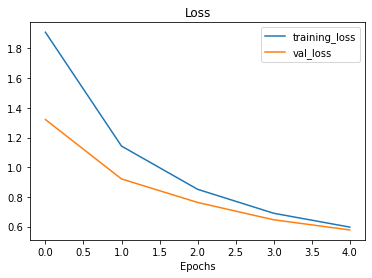

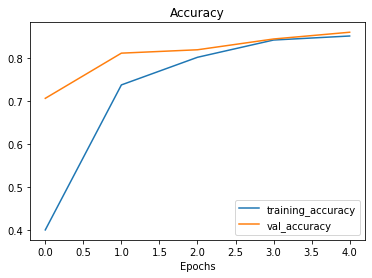

In [ ]:
plot_loss_curves(history_model_0)

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_____________________________________________________________________________________

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_2D (G (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
# Getting a Feature Vector from trained Model

In [3]:
import tensorflow as tf
input_shape = (1,4,4,3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
input_tensor.shape, input_tensor

(TensorShape([1, 4, 4, 3]),
 <tf.Tensor: shape=(1, 4, 4, 3), dtype=float32, numpy=
 array([[[[ 0.3274685 , -0.8426258 ,  0.3194337 ],
          [-1.4075519 , -2.3880599 , -1.0392479 ],
          [-0.5573232 ,  0.539707  ,  1.6994323 ],
          [ 0.28893656, -1.5066116 , -0.26454744]],
 
         [[-0.59722406, -1.9171132 , -0.62044144],
          [ 0.8504023 , -0.40604794, -3.0258412 ],
          [ 0.9058464 ,  0.29855987, -0.22561555],
          [-0.7616443 , -1.891714  , -0.9384712 ]],
 
         [[ 0.77852213, -0.47338897,  0.97772694],
          [ 0.24694404,  0.20573747, -0.5256233 ],
          [ 0.32410017,  0.02545409, -0.10638497],
          [-0.6369475 ,  1.1603122 ,  0.2507359 ]],
 
         [[-0.41728497,  0.40125778, -1.4145442 ],
          [-0.59318566, -1.6617213 ,  0.33567193],
          [ 0.10815629,  0.2347968 , -0.56668764],
          [-0.35819843,  0.88698626,  0.5274477 ]]]], dtype=float32)>)

In [7]:
tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

In [9]:
tf.keras.layers.GlobalAvgPool2D()(input_tensor)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

In [10]:
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

In [12]:
tf.keras.layers.GlobalMaxPool2D()(input_tensor)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

In [14]:
tf.reduce_max(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

In [15]:
# Experiment using Transfer Learning

In [20]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")

--2021-06-23 11:27:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.97.128, 64.233.170.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.2’

10_food_classes_1_p 100%[===================>] 127.42M  83.6MB/s    in 1.5s    

2021-06-23 11:27:32 (83.6 MB/s) - ‘10_food_classes_1_percent.zip.2’ saved [133612354/133612354]



In [21]:
# Creat tain & test dir
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [22]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There a

In [23]:
# Dataloaders
IMG_SIZE= (224,224)
BATCH_SIZE = 32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_1_percent,
                                                                           image_size = IMG_SIZE,
                                                                           batch_size=BATCH_SIZE,
                                                                           label_mode="categorical")

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE,
                                                                label_mode="categorical")

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [27]:
# Keras Functional Model -  Data Augmentation in Model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  # preprocessing.Rescaling(1/255.) # Keep for models like ResNet 50V2 not needed for effectiveNet                                      
], name="data_gugmentation")


10_food_classes_1_percent/train/chicken_curry
10_food_classes_1_percent/train/chicken_curry/3909335.jpg


(-0.5, 511.5, 511.5, -0.5)

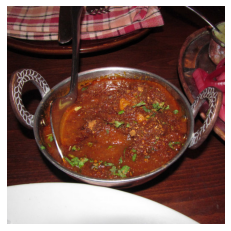

In [39]:
# visual data augmentation layer
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
target_class = random.choice(train_data_1_percent.class_names)

target_dir = "10_food_classes_1_percent/train/" + target_class
print(target_dir)

random_image = random.choice(os.listdir(target_dir))

random_image_path = target_dir+"/"+random_image
print(random_image_path)

# Read random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.axis(False)

In [40]:
data_augmentation(tf.expand_dims(img, axis=0)).shape

TensorShape([1, 429, 480, 3])

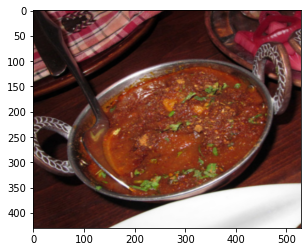

In [41]:
plt.imshow(tf.squeeze(data_augmentation(tf.expand_dims(img, axis=0)))/255.)